Technical Report: Building and Tuning Classification Models for Happiness Prediction

Introduction

In this technical report, we will walk through the process of building and tuning classification models for the task of predicting happiness levels based on a dataset called 'ACME-HappinessSurvey2020.csv'. We will use Python's Scikit-Learn library for machine learning and several classification algorithms to achieve this. The primary goal is to select the best-performing model for predicting happiness levels.

Libraries Used
Pandas: Used for data loading and manipulation.
Scikit-Learn: Used for machine learning tasks such as model selection, preprocessing, and evaluation.
XGBoost: An optimized gradient boosting library.
Warning: Used to suppress warning messages.

Data Loading and Preprocessing

The initial steps involve loading the dataset and preparing the data for machine learning.

In [1]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Ignore warnings
warnings.filterwarnings("ignore")

# Assuming your data is loaded into a pandas DataFrame df
df = pd.read_csv('ACME-HappinessSurvey2020.csv')  # If your data is in a CSV file



# Defining features and target
X = df.drop('Y', axis=1)
y = df['Y']
# Data Scaling
#Before training machine learning models, 
#it's important to scale the features to ensure that they have a similar scale. 
#This can be achieved using StandardScaler.

# Data Preprocessing and Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building Model Pipelines
pipelines = {
    'rf': Pipeline([('classifier', RandomForestClassifier())]),
    'gb': Pipeline([('classifier', GradientBoostingClassifier())]),
    'xgb': Pipeline([('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))]),
    'svc': Pipeline([('classifier', SVC())]),
    'lr': Pipeline([('classifier', LogisticRegression())]),
    'knn': Pipeline([('classifier', KNeighborsClassifier())])
}

# Hyperparameter grid intilization 
hyperparameters = {
    'rf': {'classifier__n_estimators': [100, 200], 'classifier__max_features': ['auto', 'sqrt'], 'classifier__max_depth': [None, 5, 10]},
    'gb': {'classifier__n_estimators': [100, 200], 'classifier__learning_rate': [0.05, 0.1], 'classifier__max_depth': [3, 5]},
    'xgb': {'classifier__n_estimators': [100, 200], 'classifier__learning_rate': [0.07, 0.1], 'classifier__max_depth': [3, 5]},
    'svc': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']},
    'lr': {'classifier__C': [0.01, 0.1, 1], 'classifier__solver': ['liblinear']},
    'knn': {'classifier__n_neighbors': [3, 5, 7], 'classifier__weights': ['uniform', 'distance']}
}

# Training and Tune Models
fitted_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, scoring='accuracy')
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted.')

# Evaluate and Select Best Model
best_accuracy = 0
best_classifier = None
for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = name
    print(name, 'accuracy:', accuracy)

print(f"Best model is {best_classifier} with an accuracy of {best_accuracy}")


rf has been fitted.
gb has been fitted.
xgb has been fitted.
svc has been fitted.
lr has been fitted.
knn has been fitted.
rf accuracy: 0.5
gb accuracy: 0.5384615384615384
xgb accuracy: 0.6923076923076923
svc accuracy: 0.46153846153846156
lr accuracy: 0.46153846153846156
knn accuracy: 0.5769230769230769
Best model is xgb with an accuracy of 0.6923076923076923


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best parameters found:  {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.3, 'reg_lambda': 3, 'subsample': 0.8}
Best cross-validated accuracy found:  0.6196923076923078
Accuracy on the test set: 0.7692307692307693


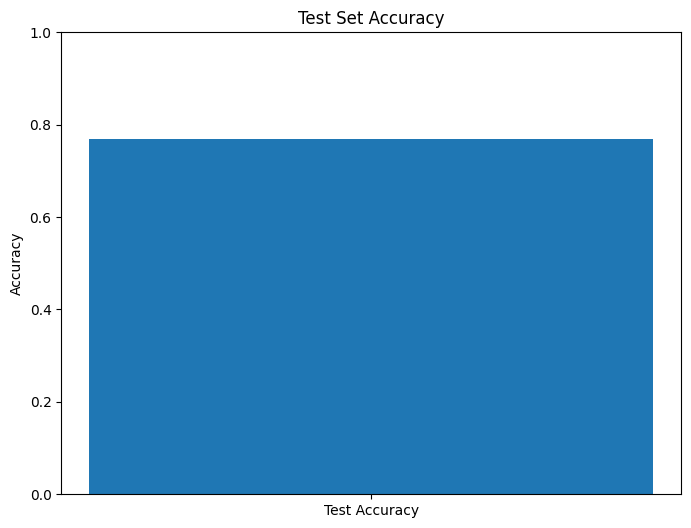

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Loading data from csv
df = pd.read_csv('ACME-HappinessSurvey2020.csv')  # If your data is in a CSV file



# Defining features and target
X = df.drop('Y', axis=1)
y = df['Y']
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a stratified split to maintain the class distribution
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create a parameter grid with narrowed focus and increased regularization
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'colsample_bytree': [0.7, 0.8],
    'subsample': [0.7, 0.8],
    'gamma': [0.1, 0.2],
    'reg_lambda': [1, 1.5, 2, 3],  # Increased regularization
    'reg_alpha': [0.1, 0.2, 0.3]
}

# Setup the GridSearchCV object with stratified K-Fold
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=stratified_kfold,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1
)

# Performing the grid search
grid_search.fit(X_scaled, y)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated accuracy found: ", grid_search.best_score_)

# Re-split the data to train the final model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Training the final model on the full training set using the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predicting on the test set with the best parameters
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {test_accuracy}')

# Plot the accuracies
plt.figure(figsize=(8, 6))
plt.bar(['Test Accuracy'], [test_accuracy])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Test Set Accuracy')
plt.show()


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best parameters found for XGBClassifier:  {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.3, 'reg_lambda': 3, 'subsample': 0.8}
Best cross-validated accuracy found for XGBClassifier:  0.6196923076923078
Accuracy on the test set for XGBClassifier: 0.7692307692307693
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found for RandomForestClassifier:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated accuracy found for RandomForestClassifier:  0.689846153846154
Accuracy on the test set for RandomForestClassifier: 0.7307692307692307
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found for GradientBoostingClassifier:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100,

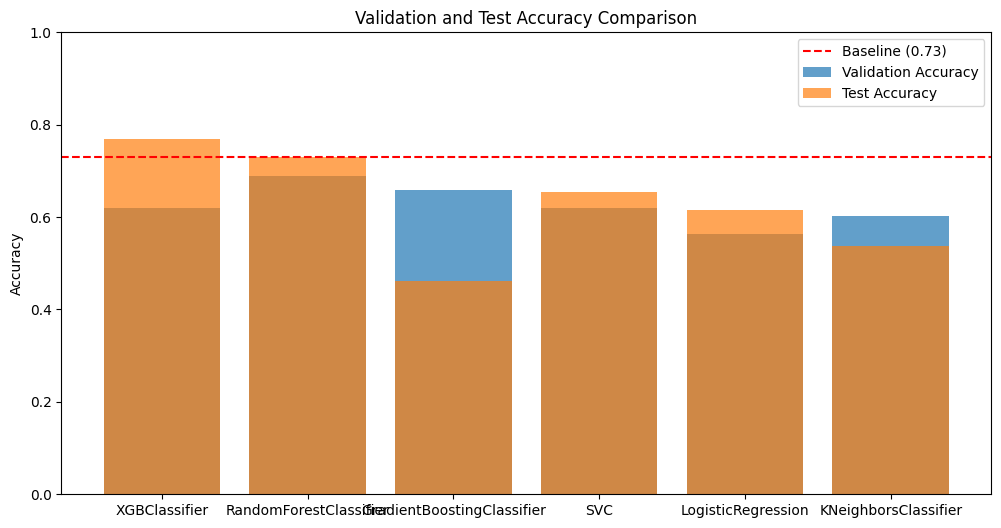

In [3]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings("ignore")


# Loading data from CSV to df
df = pd.read_csv('ACME-HappinessSurvey2020.csv')  # If your data is in a CSV file

# Defining features and target
X = df.drop('Y', axis=1)
y = df['Y']
# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a stratified split to maintain the class distribution
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the models
models = [
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    SVC(random_state=42),
    LogisticRegression(random_state=42),
    KNeighborsClassifier()
]

# Create a parameter grid for each model
param_grids = [
    {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4],
        'colsample_bytree': [0.7, 0.8],
        'subsample': [0.7, 0.8],
        'gamma': [0.1, 0.2],
        'reg_lambda': [1, 1.5, 2, 3],  # Increased regularization
        'reg_alpha': [0.1, 0.2, 0.3]
    },
    {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 4, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt'],
    },
    {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4],
        'subsample': [0.7, 0.8],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'] + [0.1, 0.2],
    },
    {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10],
    },
    {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
    }
]

# Initialize lists to store validation and test accuracies for each model
validation_accuracies = []
test_accuracies = []

for model, param_grid in zip(models, param_grids):
    # Setting up the GridSearchCV object with stratified K-Fold for the current model
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=stratified_kfold,
        verbose=1,
        scoring='accuracy',
        n_jobs=-1
    )

    # Performing the grid search
    grid_search.fit(X_scaled, y)

    # Best parameters and best score
    print(f"Best parameters found for {model.__class__.__name__}: ", grid_search.best_params_)
    print(f"Best cross-validated accuracy found for {model.__class__.__name__}: ", grid_search.best_score_)

    # Re-spliting the data to train the final model
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

    # Training the final model on the full training set using the best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Predicting on the test set with the best parameters
    y_pred = best_model.predict(X_test)

    # Calculating  the accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy on the test set for {model.__class__.__name__}: {test_accuracy}')
    
    # Store validation and test accuracies
    validation_accuracies.append(grid_search.best_score_)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies
plt.figure(figsize=(12, 6))
models_names = [model.__class__.__name__ for model in models]
plt.bar(models_names, validation_accuracies, label='Validation Accuracy', alpha=0.7)
plt.bar(models_names, test_accuracies, label='Test Accuracy', alpha=0.7)
plt.axhline(y=0.73, color='red', linestyle='--', label='Baseline (0.73)')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Validation and Test Accuracy Comparison')
plt.legend()
plt.show()
